In [1]:
# Brownian motion
# https://github.com/tirthajyoti/Stats-Maths-with-Python/blob/master/Brownian-motion-with-Python.ipynb

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

In [4]:
b = Brownian(20)

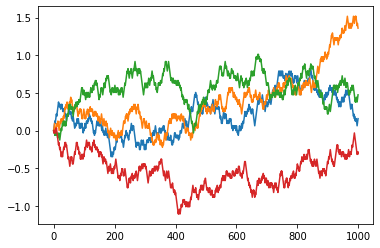

In [7]:
for i in range(4):
    plt.plot(b.gen_random_walk(1000))
plt.show()

In [10]:
# https://github.com/hautahi/sde_simulation/blob/master/sde_simulation.ipynb
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]

# SDE model parameters
mu, sigma, X0 = 2, 1, 1

# Simulation parameters
T, N = 1, 2**7
dt = 1.0 / N
t = np.arange(dt, 1 + dt, dt)  # Start at dt because Y = X0 at t = 0

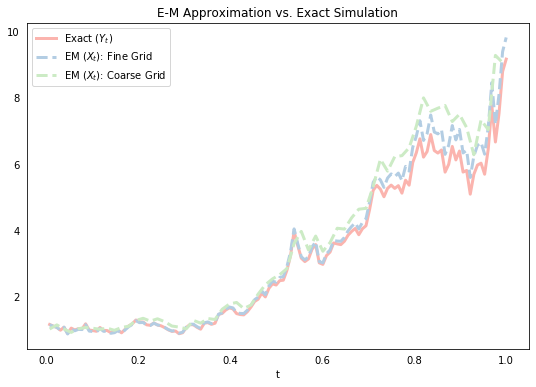

In [11]:
# Create Brownian Motion
np.random.seed(1)
dB = np.sqrt(dt) * np.random.randn(N)
B  = np.cumsum(dB)

# Exact Solution
Y = X0 * np.exp((mu - 0.5*sigma**2)*t + (sigma * B))

# EM Approximation - small dt
X_em_small, X = [], X0
for j in range(N):  
    X += mu*X*dt + sigma*X*dB[j]
    X_em_small.append(X)

# EM Approximation - big dt
X_em_big, X, R = [], X0, 2
coarse_grid = np.arange(dt,1+dt,R*dt)
for j in range(int(N/R)):
    X += mu*X* (R*dt) + sigma*X*sum(dB[R*(j-1):R*j])
    X_em_big.append(X)    
    
# Plot
plt.plot(t, Y, label="Exact ($Y_t$)", color=pal[0])
plt.plot(t, X_em_small, label="EM ($X_t$): Fine Grid", color=pal[1], ls='--')
plt.plot(coarse_grid, X_em_big, label="EM ($X_t$): Coarse Grid", color=pal[2], ls='--')
plt.title('E-M Approximation vs. Exact Simulation'); plt.xlabel('t'); plt.legend(loc = 2);